In [1]:
import pandas as pd
import re

Import the dataset and examine its metadata.

In [2]:
test_ds = pd.read_csv("task2/test_dataset.csv")
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NotebookId              190 non-null    int64 
 1   Phone                   172 non-null    object
 2   allowed_communications  190 non-null    bool  
 3   manager_name            190 non-null    object
dtypes: bool(1), int64(1), object(2)
memory usage: 4.8+ KB


In [18]:
test_ds

,index,NotebookId,Phone,allowed_communications,manager_name
0,0,10713220,380509140000,True,Ірина Савенко
1,1,3991423,380634100000,True,Анастасія Бардакова
2,2,4696490,380445010000,True,Олексій Воронін
3,3,4598164,380678140000,True,Алла Массольд
4,5,13255582,380668110000,True,Алла Массольд
...,...,...,...,...,...
167,185,1056204,380675080000,True,Меркель Анна
168,186,9835662,380993920000,True,Меркель Анна
169,187,1066133,380930757000,False,E-commerce
170,188,2449583,380979310000,True,E-commerce


First, we want to transform the 'Phone' column. We are going to drop the empty rows, get rid of non-digits in the data, convert everything to a 380xxxxxxxxx format and cast it to integer.

In [3]:
def transform_phone_number(x):
    x = re.sub('[^0-9]', '', x)
    if x[:3:] != "380" or len(x) != 12:
        if x[0] == "0":
            x = "38" + x
        elif x[0] == "8":
            x = "3" + x
    return int(x)

In [4]:
test_ds = test_ds.dropna().reset_index()
test_ds["Phone"] = test_ds["Phone"].apply(transform_phone_number)
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   172 non-null    int64 
 1   NotebookId              172 non-null    int64 
 2   Phone                   172 non-null    int64 
 3   allowed_communications  172 non-null    bool  
 4   manager_name            172 non-null    object
dtypes: bool(1), int64(3), object(1)
memory usage: 5.7+ KB


Now, let's count how many rows each manager has. 

In [5]:
pd.Series(test_ds["manager_name"]).value_counts(sort=True)

Денис Головатий         23
Марина Заєць            11
Максим Сузік            11
Алла Массольд           10
Ірина Савенко            9
Меркель Анна             8
Вікторія Рибочка         8
Ксенія Кебенко           7
Юлія Настояща            7
Олег Комарівський        7
Жанна Олещенко           6
Анастасія Ковальчук      6
Дарина Калюжна           6
Ніна Пустовойт           5
Вікторія Сігута          5
Віталій Гармаш           4
Наталія Нижник           4
Валентин Польгуй         4
Богдан Валентій          3
Тетяна Савицька          3
E-commerce               3
Катерина Удовенко        3
Михайло Косолапов        3
Вікторія Завольська      2
Вікторія Швець           2
Діана Клюжева            2
Анастасія Бардакова      1
Валентина Тураш          1
Андрій Бизов             1
Поліна Чайка             1
Микола Мірошниченко      1
Кирило Куліковський      1
Олександр Брезгун        1
Аліна Вахрамеєва         1
Олексій Воронін          1
Дмитро Cидько            1
Name: manager_name, dtype: i

Here is a bar plot to represent this data.

<AxesSubplot:>

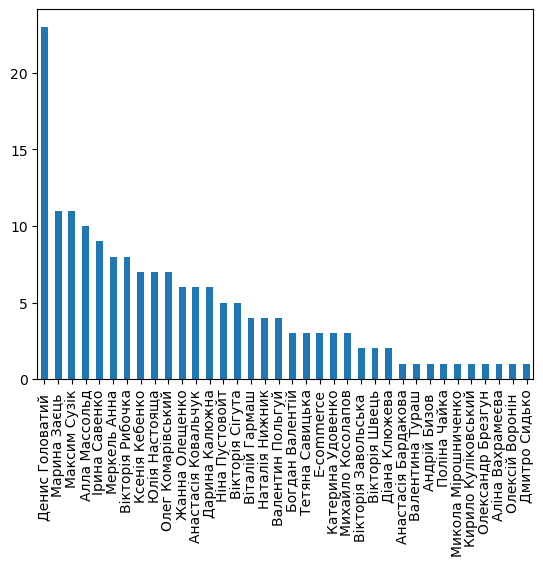

In [6]:
pd.Series(test_ds["manager_name"]).value_counts(sort=True).plot(kind='bar')

In [14]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup

In [15]:
url = "https://rabota.ua/ua/company1810293"
request_site = Request(url, headers={"User-Agent": "Mozilla/5.0"})
html = urlopen(request_site).read().decode("utf-8")
soup = BeautifulSoup(html, features="html.parser")
print(soup)

<!DOCTYPE html>
<html lang="ru"><head>
<script>
      var dataLayer = window.dataLayer
      dataLayer = dataLayer || []
      dataLayer.push({
        'gtm.start': new Date().getTime(),
        event: 'gtm.js'
      })
    </script>
<link href="https://rabota.com.ua" rel="preconnect"/>
<link href="https://cf-rabota.com.ua/" rel="preconnect"/>
<link as="font" crossorigin="" href="https://images.cf-rabota.com.ua/2017/05/fonts/graphik/Graphik-Regular-Web.woff2" rel="preload" type="font/woff2"/>
<link as="font" crossorigin="" href="https://images.cf-rabota.com.ua/2017/05/fonts/graphik/Graphik-Bold-Web.woff2" rel="preload" type="font/woff2"/>
<meta charset="utf-8"/>
<title>Robota.ua</title>
<base href="/"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="favicon.ico" rel="icon" type="image/x-icon"/>
<link href="https://alliance-desktop.rabota.ua/styles.693875557c09deb1baa5.css" rel="stylesheet"/></head

Elements that contain company details are generated by scripts, so this won't work. But, I found the request that is sent by the browser to retrieve company data.

In [67]:
import requests
import json 

In [40]:
def craft_payload(NotebookId):
    return {"operationName":"getCompanyInfoForCompanyPage","variables":{"id":f"{NotebookId}"},"query":"query getCompanyInfoForCompanyPage($id: ID!) {\n  company(id: $id) {\n    ...CompanyPageCompanyInfo\n    __typename\n  }\n}\n\nfragment CompanyPageCompanyInfo on Company {\n  id\n  name\n  logoUrl\n  companyUrl\n  description\n  isVerified\n  isBrendProfile\n  miniProfile {\n    ...CompanyPageMiniProfile\n    __typename\n  }\n  socialMedia {\n    ...CompanyPageSocialMedia\n    __typename\n  }\n  __typename\n}\n\nfragment CompanyPageMiniProfile on CompanyMiniProfile {\n  isEnabled\n  years\n  staffSize {\n    id\n    name\n    __typename\n  }\n  benefits {\n    id\n    name\n    __typename\n  }\n  images\n  __typename\n}\n\nfragment CompanyPageSocialMedia on CompanySocialMedia {\n  facebookUrl\n  instagramUrl\n  linkedInUrl\n  __typename\n}\n"}

In [41]:
url = "https://dracula.rabota.ua/?q=getCompanyInfoForCompanyPage" # url for the request
notebookId = "1810293"  # company id (taken from the dataset)
response0 = requests.post(url=url, json=craft_payload(notebookId)).content.decode("utf-8")
response0

'{"data":{"company":{"id":"1810293","name":"Haus Mobel ","logoUrl":"https://company-logo-frankfurt.rabota.ua/Mebli-Stilj-Fabrika-_20160627090424.gif","companyUrl":"http://www.hausmobel.eu/","description":"Наша фабрика вже 19 років на ринку Ураїни, в даний час ми експортуємо наші вироби за кордон і постійно удосконалюємося та ростемо. Ми не зупиняємося на досягнутому, розширюємо переваги, які зроблять життя наших працівників ще більш комфортним.","isVerified":true,"isBrendProfile":false,"miniProfile":{"isEnabled":false,"years":-1,"staffSize":{"id":"3","name":"від 100 до 250","__typename":"CompanyStaffSize"},"benefits":[],"images":[],"__typename":"CompanyMiniProfile"},"socialMedia":{"facebookUrl":"","instagramUrl":"","linkedInUrl":"","__typename":"CompanySocialMedia"},"__typename":"Company"}}}\n'

As can be seen, the response contains company name, details about the company, its verification status, company size (max), social media links, etc. I am going to extract company name, size and verification status from the response and add it to the dataset.

In [75]:
company_name = []
verification_status = []
company_size = []


def extract_company_data(NotebookId):
    try:
        response = requests.post(url=url, json=craft_payload(NotebookId)).content.decode("utf-8")
        data = json.loads(response)
        company_name.append(data["data"]["company"]["name"])
        verification_status.append(data["data"]["company"]["isVerified"])
        staff_size = data["data"]["company"]["miniProfile"]["staffSize"]["name"]
        if staff_size == "не вказано":
            company_size.append(0)
        else:
            company_size.append(int(staff_size[staff_size.rfind(' ') + 1::]))
    except Exception as e:
        print(e)

In [76]:
for nbId in test_ds["NotebookId"]:
    extract_company_data(nbId)

In [77]:
test_ds['company_name'] = company_name
test_ds['verification_status'] = verification_status
test_ds['company_size'] = company_size
test_ds

,index,NotebookId,Phone,allowed_communications,manager_name,company_name,verification_status,company_size
0,0,10713220,380509140000,True,Ірина Савенко,Fine Art Shippers,True,20
1,1,3991423,380634100000,True,Анастасія Бардакова,Synergy group,True,500
2,2,4696490,380445010000,True,Олексій Воронін,PowerExpert,True,20
3,3,4598164,380678140000,True,Алла Массольд,"Visak, Отель",True,100
4,5,13255582,380668110000,True,Алла Массольд,"Нечволод С.О., ФОП",False,0
...,...,...,...,...,...,...,...,...
167,185,1056204,380675080000,True,Меркель Анна,"ЛБ Ритейл, ТОВ",True,100
168,186,9835662,380993920000,True,Меркель Анна,Благий і компанія,False,20
169,187,1066133,380930757000,False,E-commerce,Service OnLine Technology,False,100
170,188,2449583,380979310000,True,E-commerce,"Транс Кеа Логистик, ООО",False,20


Now that company dat has been extracted, we can make a few graphs to look at it.

<AxesSubplot:>

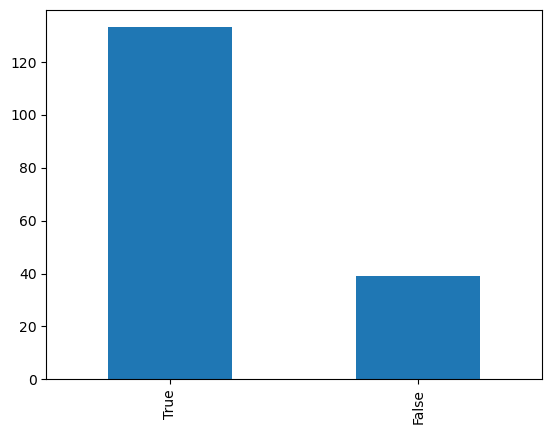

In [78]:
pd.Series(test_ds["verification_status"]).value_counts(sort=True).plot(kind='bar')

<AxesSubplot:>

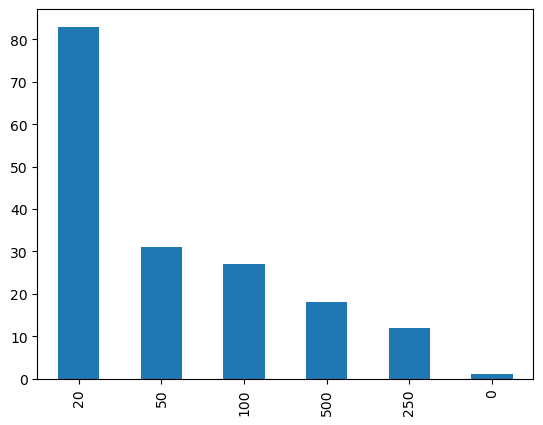

In [81]:
pd.Series(test_ds["company_size"]).value_counts(sort=True).plot(kind='bar')